## iris dataset으로 PCA

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data,columns=columns)
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


2차원으로 품종 데이터 분포 확인

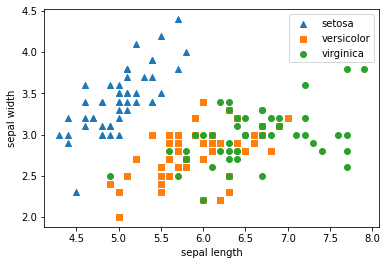

In [2]:
markers=['^','s','o']

#setosa의 target값은 0, versicolor는 1, virginica는2
#각 타겟별로 다른모양으로 표시

for i,marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target'] == i]['sepal_length']
    y_axis_data = iris_df[iris_df['target'] == i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

StandardScaler로 스케일 변환

In [3]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

2차원의 PCA데이터로 변환

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
#pca 변환된 데이터의 컬럼 명을 각각 pca_component1,2로 명명
pca_columns = ['pca_component_1','pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca,columns=pca_columns)
iris_df_pca['target'] = iris.target
iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


2개 속성으로 변환된 데이터셋 2차원상에 시각화

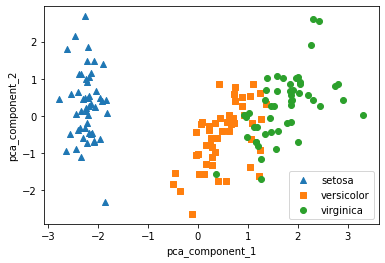

In [6]:
markers = ['^','s','o']

#pca_compontent_1이 x축, pca_component_2가 y축
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target'] == i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label = iris.target_names[i])
    

    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


랜덤포레스트 적용

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rf,iris.data,iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 정확도 : ',scores)
print('원본 데이터 평균 정확도 : ',np.mean(scores))

원본 데이터 교차 검증 정확도 :  [0.98 0.94 0.96]
원본 데이터 평균 정확도 :  0.96


In [9]:
#2차원 PCA 변환 데이터셋에 적용
pca_X = iris_df_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rf,pca_X,iris.target,scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차 검증 정확도 : ',scores_pca)
print('PCA 변환 데이터 평균 정확도 : ',np.mean(scores_pca))

PCA 변환 데이터 교차 검증 정확도 :  [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도 :  0.88


## 신용카드 데이터

In [11]:
import pandas as pd
df = pd.read_excel('default of credit card clients.xls',header=1,sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
df.rename(columns = {'PAY_0':'PAY1','default payment next month':'default'},inplace=True)
y_target = df['default']
X_features = df.drop('default',axis=1)

<AxesSubplot:>

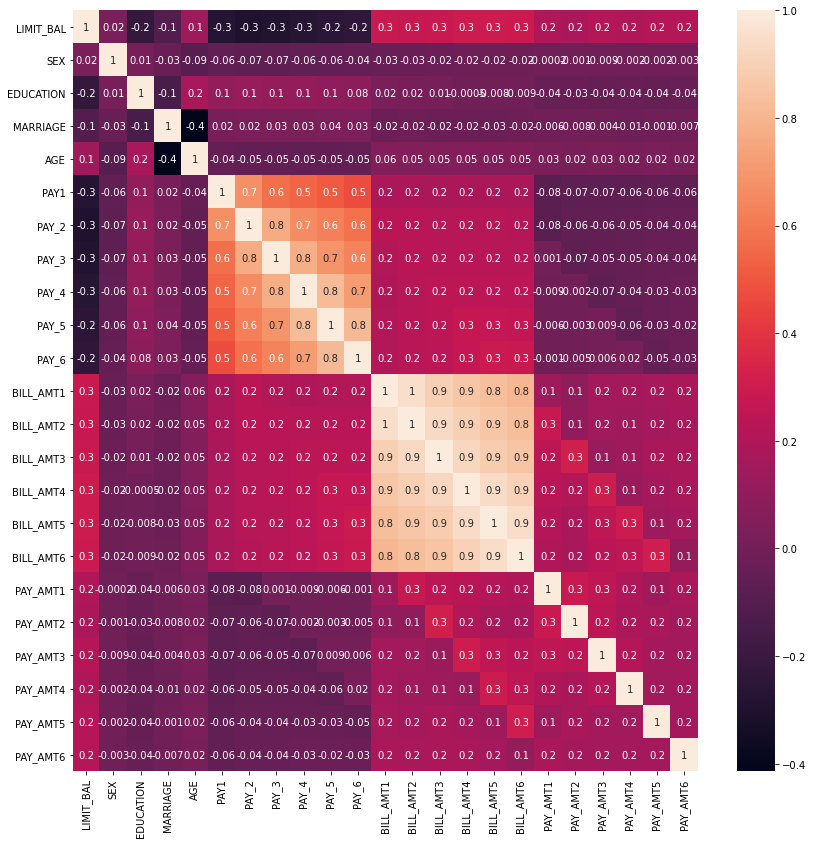

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

bill_amti1~6의 속성끼리 상관도가 매우 높아 PCA로 2개 속성으로 변환

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT 6개 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print("대상 속성명 : ",cols_bill)

#2개의 PCA 속성을 가진 PCA 객체 생성, explained_variance_ratio 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print("PCA Components별 변동성 : ",pca.explained_variance_ratio_)

대상 속성명 :  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Components별 변동성 :  [0.90555253 0.0509867 ]


원본 데이터셋과 6개의 컴포넌트로 PCA 변환한 데이터셋의 분류 예측 결과 비교

In [20]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=300,random_state = 156)
scores = cross_val_score(rf,X_features,y_target,scoring='accuracy',cv=3)

print("CV=3인 경우의 개별 Fold세트별 정확도 : ",scores)
print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

CV=3인 경우의 개별 Fold세트별 정확도 :  [0.8083 0.8196 0.8232]
평균 정확도 : 0.8170


In [21]:
#PCA 변환 데이터
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rf,df_pca,y_target,scoring='accuracy',cv=3)

print("CV=3인 경우의 PCA 개별 Fold 세트별 정확도 : ",scores_pca)
print("PCA 변환 데이터 세트 평균 정확도 : {0:.4f}".format(np.mean(scores_pca)))

CV=3인 경우의 PCA 개별 Fold 세트별 정확도 :  [0.7919 0.7974 0.8029]
PCA 변환 데이터 세트 평균 정확도 : 0.7974
